In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mnist=keras.datasets.mnist
(train_features, train_labels),(test_features, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_features.shape

(60000, 28, 28)

In [5]:
test_features.shape

(10000, 28, 28)

4


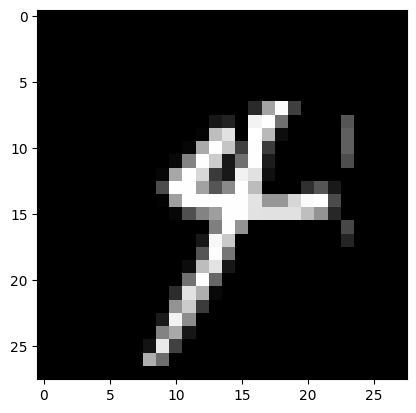

In [6]:
idx=53
img=train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

Preprocessing


In [7]:
np.min(img), np.max(img)

(0, 255)

In [8]:
train_features= train_features/255.0       # normalize
test_features= test_features/255.0

Model Definition

In [9]:
model= keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'] )
model.build(input_shape=(None,28,28))
model.summary()
hist=model.fit(train_features, train_labels, epochs=1000, batch_size=256, validation_data=(test_features, test_labels) )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
235/235 [==============================] - 4s 7ms/step - loss: 0.3276 - accuracy: 0.9069 - val_loss: 0.1485 - val_accuracy: 0.9549
Epoch 2/

In [10]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9828


[0.17371228337287903, 0.9828000068664551]

6


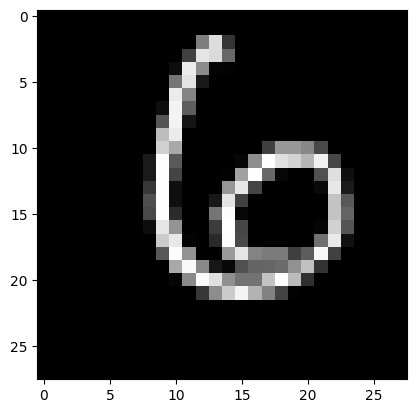

In [12]:
idx=100
img= test_features[idx]
label =test_labels[idx]
print(label)
plt.gray()
plt.imshow(img)


In [13]:
print(img.shape)
test_data= np.reshape(img,(-1,784))        # 28*28=784
print(test_data.shape)
model.predict(test_data)

(28, 28)
(1, 784)
1/1 [==============================] - 0s 146ms/step


array([[4.7021587e-18, 4.2393587e-23, 1.4472182e-17, 3.2792983e-23,
        2.2966439e-20, 4.3819140e-15, 1.0000000e+00, 8.5242613e-25,
        8.2718703e-17, 2.4531263e-27]], dtype=float32)

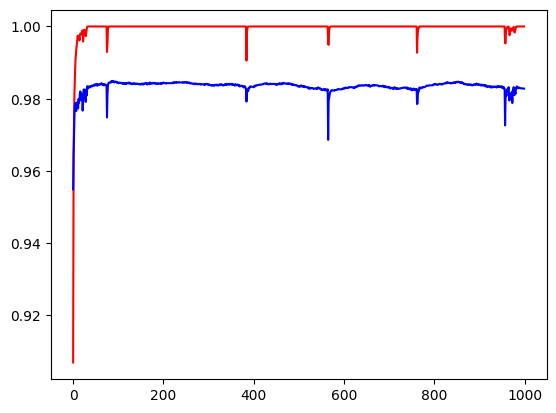

In [14]:
acc= hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(acc,color='red')
plt.plot(val_acc,color='blue')